# DBSCAN & HDBSCAN Clustering

In [1]:
import random as rd
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN, HDBSCAN

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
NUM_NODES = 50

MAX_X = 500
MAX_Y = 500

DBSCAN_RADIUS = 80 # 分群使用半徑
DBSCAN_MIN_SAMPLE = 6
DBSCAN_METRIC = 'manhattan'

In [28]:
def create_data_model():

    data = {}
    data["num_locations"] = [(rd.randint(1, MAX_X), rd.randint(1, MAX_Y)) for i in range(NUM_NODES)]
    data["distance_matrix"] = compute_manhattan_distance_matrix(data["num_locations"])

    return data

def compute_manhattan_distance_matrix(nodes):
    distance_matrix = []
    for node_i in nodes:
        distances = []
        for node_j in nodes:
            if node_i == node_j:
                distances.append(0)
            else:
                manhattan_distance = np.sum(np.abs(np.array(node_i) - np.array(node_j)))
                distances.append(manhattan_distance)
        distance_matrix.append(distances)
    return distance_matrix

data = create_data_model()
pd.DataFrame(data).head()

,num_locations,distance_matrix
0,"(292, 43)","[0, 382, 269, 289, 411, 189, 376, 461, 75, 576..."
1,"(64, 197)","[382, 0, 113, 481, 249, 193, 88, 535, 359, 276..."
2,"(153, 173)","[269, 113, 0, 368, 184, 118, 107, 470, 246, 30..."
3,"(486, 138)","[289, 481, 368, 0, 510, 288, 475, 410, 364, 67..."
4,"(174, 336)","[411, 249, 184, 510, 0, 222, 161, 286, 388, 16..."


## DBSCAN

{0, 1, 2, -1}
[-1  1  1 -1 -1  2  1  3 -1  0  3  0 -1 -1  2  1  2  0 -1  2  2  2 -1 -1
 -1 -1  0  3  0  0 -1  3  1  3 -1 -1  0 -1 -1 -1 -1  0  1 -1  3 -1 -1  0
 -1  0]


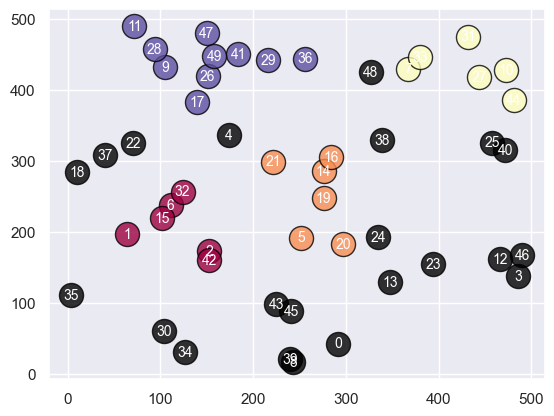

In [31]:
# eps = 點的半徑, min_samples = 群最小的樣本數
dbscan = DBSCAN(eps=DBSCAN_RADIUS, min_samples=DBSCAN_MIN_SAMPLE).fit(np.array(data['num_locations'])) 
db_labels = dbscan.labels_
unique_db_labels = set(db_labels)

print(unique_hdb_labels)
print(db_labels)

if len(unique_db_labels) == 1:
    print('Failed clustering!')

else:
    color_labels = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_db_labels))]
    colors = [color_labels[label - 1] for label in db_labels] # combine labes and colors

    for node, label, color in zip(data['num_locations'], db_labels, colors):
        if label == -1:
            # Black used for noise.
            color = [0, 0, 0, 1]
        plt.scatter(x=node[0], y=node[1], s=300, color=color, alpha=0.8, edgecolors='black') 
        plt.text(x=node[0], y=node[1], s=str(data['num_locations'].index(node)), fontsize=10, color="white", horizontalalignment='center', verticalalignment='center')
    plt.show()

## HDBSCAN

{0, 1, 2, -1}
[-1  0  0 -1  1  0  0  2 -1  1  2 -1 -1 -1  0  0 -1  1 -1  0  0 -1 -1  0
  0  2  1  2  1  1 -1 -1  0  2 -1 -1  1 -1 -1  0 -1  1  0  0 -1  0 -1  1
  2  1]


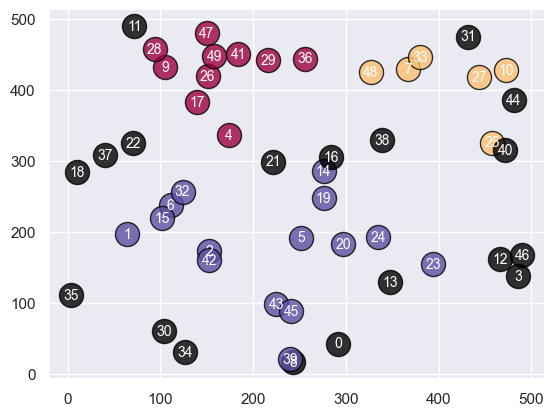

In [32]:
hdb = HDBSCAN(min_cluster_size=DBSCAN_MIN_SAMPLE, metric=DBSCAN_METRIC).fit(data['num_locations'])
hdb_labels = hdb.labels_
unique_hdb_labels = set(hdb_labels)

print(unique_hdb_labels)
print(hdb_labels)

if len(unique_hdb_labels) == 1:
    print('Failed clustering!')

else:
    color_labels = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_hdb_labels))]
    colors = [color_labels[label - 1] for label in hdb_labels] # combine labes and colors

    for node, label, color in zip(data['num_locations'], hdb_labels, colors):
        if label == -1:
            # Black used for noise.
            color = [0, 0, 0, 1]
        plt.scatter(x=node[0], y=node[1], s=300, color=color, alpha=0.8, edgecolors='black') 
        plt.text(x=node[0], y=node[1], s=str(data['num_locations'].index(node)), fontsize=10, color="white", horizontalalignment='center', verticalalignment='center')
    plt.show()